# Open Exploration - Candidate Policies

The four candidate policies from Scenario Discovery are analyzed using open exploration. We are interested in how the policy levers in those specific policies map to the outcomes of interest for Dike Ring 4. We are also interested in the influence of uncertainties on these outcomes.  

A predominantly visual analysis to completed to allow for faster interpretation of the relationships.

## Visual Analysis of Candidate Policies - Policy Levers and Outcomes of Interest

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import time

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.3
2.4


In [3]:
# loading results from csv files 
candidatepols = pd.read_csv('candidate_policies.csv')
#experiments0 = pd.read_csv('candidate_policies_experiments.csv')
#outcomes0 = pd.read_csv('candidate_policies_outcomes.csv')
#other = pd.read_csv('candidate_policies_other.csv')
#outcomesdf = pd.DataFrame(outcomes0)
#experimentsdf = pd.DataFrame(experiments0)

In [4]:
candidatepols

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs,_RfRin other regions,DikeIncreasein other regions,dependency
0,3111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,7280.065716,0.0,0.0,2.444716e+07,23060000.0,5518.400368,4.751268e+07,8.0,50.0,58.0
1,1165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,4.633631e+07,99700000.0,29.557944,1.460363e+08,4.0,56.0,60.0
2,3320,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3677.591000,0.0,0.0,2.982631e+07,94780000.0,5384.523618,1.246117e+08,8.0,27.0,35.0
3,2264,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,3.983994e+07,218720000.0,55.380053,2.585600e+08,12.0,26.0,38.0


In [5]:
#checking
experimentsdf=candidatepols.iloc[:,0:32]
experimentsdf.rename(columns={ experimentsdf.columns[0]: "policy" }, inplace = True)
experimentsdf

,policy,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,3111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,7.0,0.0,7.0,6.0,4.0,0.0,3.0,7.0,6.0
1,1165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,1.0,6.0,10.0,5.0,1.0,5.0,7.0,3.0
2,3320,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,6.0,6.0,2.0,1.0,0.0,0.0,1.0
3,2264,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,5.0,2.0,10.0,1.0,2.0,4.0,0.0,4.0


In [6]:
outcomesdf=candidatepols.iloc[:,32:89]
outcomesdf['policy']=candidatepols.iloc[:,0]

outcomesdf

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs,policy
0,0.0,6.071731e+07,0.0,1.531977e+08,4.784270e+07,0.023327,0.0,3.422156e+07,0.0,0.0,...,0.00000,30700000.0,7280.065716,0.0,0.0,2.444716e+07,23060000.0,5518.400368,4.751268e+07,3111
1,0.0,4.229150e+07,0.0,5.837893e+06,3.824512e+07,0.002016,0.0,3.139880e+07,0.0,0.0,...,0.00000,121200000.0,0.000000,0.0,0.0,4.633631e+07,99700000.0,29.557944,1.460363e+08,1165
2,0.0,3.725520e+07,0.0,1.864617e+08,4.784270e+07,0.028622,0.0,0.000000e+00,0.0,0.0,...,0.00646,0.0,3677.591000,0.0,0.0,2.982631e+07,94780000.0,5384.523618,1.246117e+08,3320
3,0.0,3.269490e+07,0.0,0.000000e+00,4.784270e+07,0.000000,0.0,2.640338e+07,0.0,0.0,...,0.00000,121200000.0,0.000000,0.0,0.0,3.983994e+07,218720000.0,55.380053,2.585600e+08,2264


In [7]:
other=candidatepols.iloc[:,89:92]
other['policy']=candidatepols.iloc[:,0]
other

,_RfRin other regions,DikeIncreasein other regions,dependency,policy
0,8.0,50.0,58.0,3111
1,4.0,56.0,60.0,1165
2,8.0,27.0,35.0,3320
3,12.0,26.0,38.0,2264


In [8]:
#extracting outcomes of interest - for Dike Ring 4
outcomes_of_interest = ['Total A.4 Expected Annual Damage','Total A.4 Expected Number of Deaths',
                        'Total A.4 Dike Investment Costs', 'Total A.4RfR Total Costs',
                        'Total A.4Expected Evacuation Costs']

outcomes_interest= {k:v.tolist() for k, v in outcomesdf.items()}
outcomesdf_rev = pd.DataFrame.from_dict(outcomes_interest)
outcomesdf_rev = outcomesdf_rev[outcomes_of_interest]
outcomesdf_rev.head()

,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs
0,0.0,0.0,2.444716e+07,23060000.0,5518.400368
1,0.0,0.0,4.633631e+07,99700000.0,29.557944
2,0.0,0.0,2.982631e+07,94780000.0,5384.523618
3,0.0,0.0,3.983994e+07,218720000.0,55.380053


### Visualizing outcomes by policy

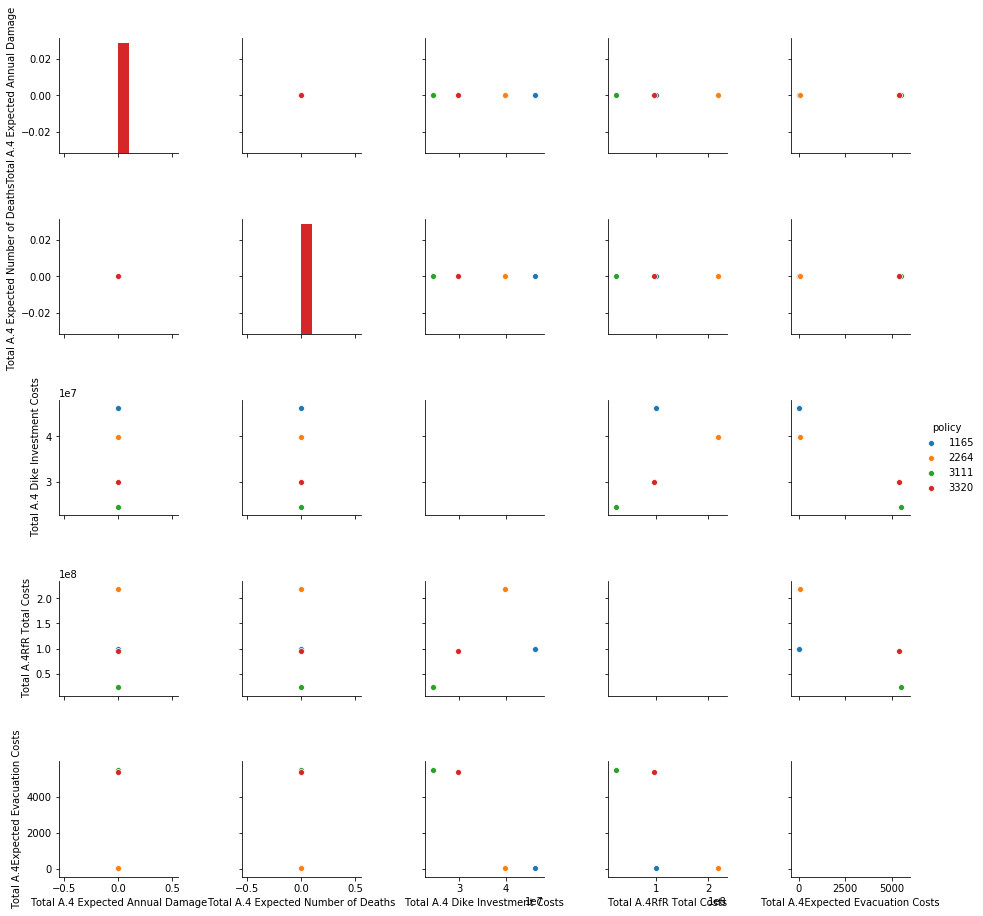

In [9]:
#scatter plot
sns.pairplot(outcomesdf, hue='policy', vars=outcomesdf_rev.keys(), diag_kind='hist')

### Results Summary - Pair Plots

* The Expected Annual Damage (EAD) and Expected Number of Deaths (END) is zero for all policies. This is due to the constraint applied during Scenario Discovery to ensure that these two outcomes were zero.
* Policy number 3111 has the highest expected evacuation costs and the lowest RfR and dike investment costs. This is expected as this policy has a high number of days for the evacuation warning system (i.e. 3 days) and does not invest much in the key flood protection measures - therefore the need to evacuate people when a flood occurs is higher. 
* Policies number 1165 and 2264 have the lowest expected evacuation costs but differing dike investment and RfR costs. Policy 2264 invests more in RfR (the highest RfR costs) than in dikes, whereas Policy 1165 invests more in dikes (highest dike costs).
* Policy number 3320 has medium RfR and dike investment costs but one of the highest evacuation costs.

This reflects the tradeoff that is made between investment in the dikes and RfR versus investment in early warning systems, which is shown more clearly in the figure below.  

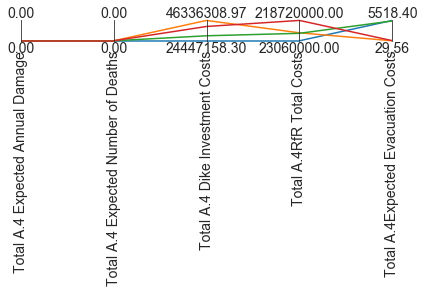

In [10]:
#parcoords tradeoff plot - anyone know how to make bigger/add legend?
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(outcomesdf_rev)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomesdf_rev)

### Results summary - Parcoords
As shown above, Policy 1165 (orange) and 2264 (red) show the tradeoffs between Dike Investment/RfR costs and evacuation (i.e. as both of these increase, the cost of evacuation decreases). Policies 3111 (blue) and 3320 (green) show the same thing but in reverse.

In summary, this figure shows that if more money is invested in flood protection measures (dike heightening, room for the river) in Dike Ring 4, less money is necessary for flood mitigation measures (evacuation). However the relative costs for the available measures are significantly different.  

### Feature scoring to see influence of policies on outcomes

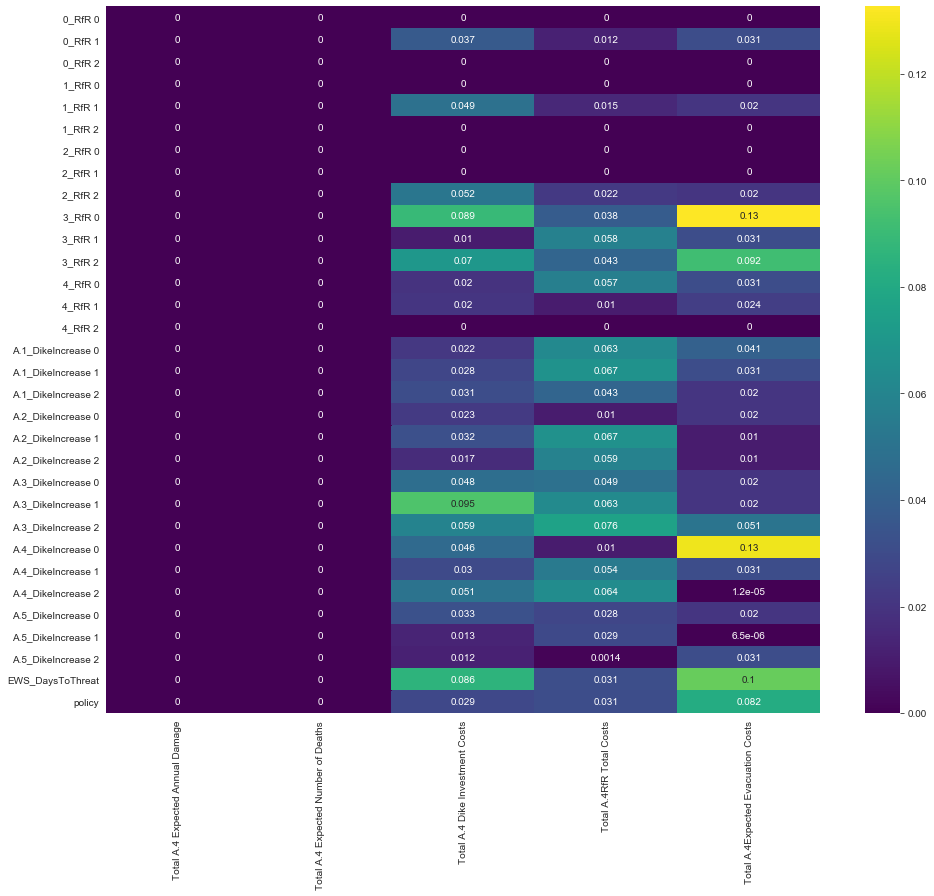

In [11]:
from ema_workbench.analysis import feature_scoring

x = experimentsdf
y = outcomesdf_rev

fs = feature_scoring.get_feature_scores_all(x, y)


plt.figure(figsize = (16,13))
sns.heatmap(fs, cmap='viridis', annot=True, )
plt.show()

### Results Summary - Feature Scoring

The feature scoring shows that the policy levers that have the most influence on Dike Ring 4 outcomes (regardless of policy number) are RfR policies in Dike Rings 3, 4 and 5 (2_RfR, 3_RfR, 4RfR) and dike heightening in Dike Rings 3 and 4 . There is some influence from RfR in Dike Rings 1 and 2 (0_RfR, 1_RfR), and the EWS system in all dike rings. 

## Visual Analysis of Candidate Policies -  Uncertainties and Outcomes of Interest

In [12]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [13]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)
from ema_workbench import (SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

In [14]:
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage 0')
ScalarOutcome('A.1_Dike Investment Costs 0')
ScalarOutcome('A.1_Expected Number of Deaths 0')
ScalarOutcome('A.2_Expected Annual Damage 0')
ScalarOutcome('A.2_Dike Investment Costs 0')
ScalarOutcome('A.2_Expected Number of Deaths 0')
ScalarOutcome('A.3_Expected Annual Damage 0')
ScalarOutcome('A.3_Dike Investment Costs 0')
ScalarOutcome('A.3_Expected Number of Deaths 0')
ScalarOutcome('A.4_Expected Annual Damage 0')
ScalarOutcome('A.4_Dike Investment Costs 0')
ScalarOutcome('A.4_Expected Number of Deaths 0')
ScalarOutcome('A.5_Expected Annual Damage 0')
ScalarOutcome('A.5_Dike Investment Costs 0')
ScalarOutcome('A.5_Expected Number of Deaths 0')
ScalarOutcome('RfR Total Costs 0')
ScalarOutcome('Expected Evacuation Costs 0')
ScalarOutcome('A.1_Expected Annual Damage 1')
ScalarOutcome('A.1_Dike Investment Costs 1')
ScalarOutcome('A.1_Expected Number of Deaths 1')
ScalarOutcome('A.2_Expected Annual Damage 1')
ScalarOutcome('A.2_Dike Investment

In [15]:
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [16]:
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [22]:
candidatepols.iloc[0,0]

3111

In [23]:
#defining candidate policies

nopolicy = [Policy("base case", **{k.name: 0 for k in dike_model.levers})]

candidatepolicies = []
for i in range(len(candidatepols)):
    u1 = candidatepols.iloc[i,1]
    u2 = candidatepols.iloc[i,2]
    u3 = candidatepols.iloc[i,3]
    u4 = candidatepols.iloc[i,4]
    u5 = candidatepols.iloc[i,5]
    u6 = candidatepols.iloc[i,6]
    u7 = candidatepols.iloc[i,7]
    u8 = candidatepols.iloc[i,8]
    u9 = candidatepols.iloc[i,9]
    u10 = candidatepols.iloc[i,10]
    u11 = candidatepols.iloc[i,11]
    u12 = candidatepols.iloc[i,12]
    u13 = candidatepols.iloc[i,13]
    u14 = candidatepols.iloc[i,14]
    u15 = candidatepols.iloc[i,15]
    u16 = candidatepols.iloc[i,16]
    u17 = candidatepols.iloc[i,17]
    u18 = candidatepols.iloc[i,18]
    u19 = candidatepols.iloc[i,19]
    u20 = candidatepols.iloc[i,20]
    u21 = candidatepols.iloc[i,21]
    u22 = candidatepols.iloc[i,22]
    u23 = candidatepols.iloc[i,23]
    u24 = candidatepols.iloc[i,24]
    u25 = candidatepols.iloc[i,25]
    u26 = candidatepols.iloc[i,26]
    u27 = candidatepols.iloc[i,27]
    u28 = candidatepols.iloc[i,28]
    u29 = candidatepols.iloc[i,29]
    u30 = candidatepols.iloc[i,30]
    u31 = candidatepols.iloc[i,31]
    candidatepolicies.append(Policy(f"{candidatepols.iloc[i,0]}",
                                    **{'0_RfR 0': u1, '0_RfR 1': u2, '0_RfR 2': u3, 
                                                                '1_RfR 0': u4, '1_RfR 1': u5, '1_RfR 2': u6, 
                                                                '2_RfR 0': u7, '2_RfR 1': u8, '2_RfR 2': u9, 
                                                                '3_RfR 0': u10, '3_RfR 1': u11, '3_RfR 2': u12, 
                                                                '4_RfR 0': u13, '4_RfR 1': u14, '4_RfR 2': u15, 
                                                                'EWS_DaysToThreat': u16, 'A.1_DikeIncrease 0': u17, 
                                                                'A.1_DikeIncrease 1': u18, 'A.1_DikeIncrease 2': u19, 
                                                                'A.2_DikeIncrease 0': u20, 'A.2_DikeIncrease 1': u21, 
                                                                'A.2_DikeIncrease 2': u22, 'A.3_DikeIncrease 0': u23, 
                                                                'A.3_DikeIncrease 1': u24, 'A.3_DikeIncrease 2': u25, 
                                                                'A.4_DikeIncrease 0': u26, 'A.4_DikeIncrease 1': u27, 
                                                                'A.4_DikeIncrease 2': u28, 'A.5_DikeIncrease 0': u29, 
                                                                'A.5_DikeIncrease 1': u30, 'A.5_DikeIncrease 2': u31}))
candidatepolicies

[Policy({'0_RfR 0': 0.0, '0_RfR 1': 1.0, '0_RfR 2': 0.0, '1_RfR 0': 0.0, '1_RfR 1': 0.0, '1_RfR 2': 0.0, '2_RfR 0': 0.0, '2_RfR 1': 0.0, '2_RfR 2': 1.0, '3_RfR 0': 0.0, '3_RfR 1': 0.0, '3_RfR 2': 0.0, '4_RfR 0': 0.0, '4_RfR 1': 0.0, '4_RfR 2': 0.0, 'EWS_DaysToThreat': 3.0, 'A.1_DikeIncrease 0': 6.0, 'A.1_DikeIncrease 1': 7.0, 'A.1_DikeIncrease 2': 3.0, 'A.2_DikeIncrease 0': 3.0, 'A.2_DikeIncrease 1': 1.0, 'A.2_DikeIncrease 2': 0.0, 'A.3_DikeIncrease 0': 7.0, 'A.3_DikeIncrease 1': 0.0, 'A.3_DikeIncrease 2': 7.0, 'A.4_DikeIncrease 0': 6.0, 'A.4_DikeIncrease 1': 4.0, 'A.4_DikeIncrease 2': 0.0, 'A.5_DikeIncrease 0': 3.0, 'A.5_DikeIncrease 1': 7.0, 'A.5_DikeIncrease 2': 6.0}),
 Policy({'0_RfR 0': 0.0, '0_RfR 1': 0.0, '0_RfR 2': 0.0, '1_RfR 0': 0.0, '1_RfR 1': 0.0, '1_RfR 2': 0.0, '2_RfR 0': 0.0, '2_RfR 1': 0.0, '2_RfR 2': 0.0, '3_RfR 0': 1.0, '3_RfR 1': 0.0, '3_RfR 2': 1.0, '4_RfR 0': 0.0, '4_RfR 1': 1.0, '4_RfR 2': 0.0, 'EWS_DaysToThreat': 1.0, 'A.1_DikeIncrease 0': 3.0, 'A.1_DikeIncrease 

In [24]:
#pass the policies list to EMA workbench experiment runs
n_scenarios=1000

start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments,outcomes = evaluator.perform_experiments(n_scenarios, policies=candidatepolicies)
    
end = time.time()
print("time taken: {} seconds".format((end-start)))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2800 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 2572.6419711112976 seconds


In [25]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,75.0,313.010896,1.5,0.600083,318.690386,1,0.515608,35.745149,10,0.617975,...,7.0,6.0,4.0,0.0,3.0,7.0,6.0,0,3111,dikesnet
1,80.0,71.532664,1,0.809164,244.359716,10,0.103317,226.183823,1.5,0.715090,...,7.0,6.0,4.0,0.0,3.0,7.0,6.0,1,3111,dikesnet
2,50.0,75.012109,10,0.950862,302.371360,10,0.452042,220.084599,1.5,0.770772,...,7.0,6.0,4.0,0.0,3.0,7.0,6.0,2,3111,dikesnet
3,67.0,87.833466,10,0.210828,261.485648,1,0.421158,91.489010,1.5,0.186767,...,7.0,6.0,4.0,0.0,3.0,7.0,6.0,3,3111,dikesnet
4,10.0,203.105334,1.5,0.494020,154.922073,1.5,0.504516,319.035132,1,0.364521,...,7.0,6.0,4.0,0.0,3.0,7.0,6.0,4,3111,dikesnet


In [26]:
outcomes

{'A.1_Expected Annual Damage 0': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Dike Investment Costs 0': array([60717312.84309486, 60717312.84309486, 60717312.84309486, ...,
        32694901.09416194, 32694901.09416194, 32694901.09416194]),
 'A.1_Expected Number of Deaths 0': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Expected Annual Damage 0': array([       0.        , 20211787.49783444,        0.        , ...,
         2074510.89368847,        0.        ,  6636322.77972192]),
 'A.2_Dike Investment Costs 0': array([47842699.56310011, 47842699.56310011, 47842699.56310011, ...,
        47842699.56310011, 47842699.56310011, 47842699.56310011]),
 'A.2_Expected Number of Deaths 0': array([0.        , 0.00218898, 0.        , ..., 0.00036718, 0.        ,
        0.00092935]),
 'A.3_Expected Annual Damage 0': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.3_Dike Investment Costs 0': array([34221561.73832255, 34221561.73832255, 34221561.73832255, ...,
        26403379.54230644, 26403379.54230644, 26

In [27]:
outcomes_cpdf = pd.DataFrame(outcomes)
experiments_cpdf = pd.DataFrame(experiments)

In [28]:
outcomes_cpdf

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,0.000000e+00,6.071731e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,3.422156e+07,0.0,0.000000e+00,...,4.329581e+07,0.0,0.0,0,0.0,0.0,5.635652e+07,0.0,30700000.0,0.000000
1,0.000000e+00,6.071731e+07,0.000000,2.021179e+07,4.784270e+07,0.002189,0.0,3.422156e+07,0.0,0.000000e+00,...,4.329581e+07,0.0,0.0,0,0.0,0.0,5.635652e+07,0.0,30700000.0,347.133514
2,0.000000e+00,6.071731e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,3.422156e+07,0.0,0.000000e+00,...,4.329581e+07,0.0,0.0,0,0.0,0.0,5.635652e+07,0.0,30700000.0,0.000000
3,0.000000e+00,6.071731e+07,0.000000,5.580616e+05,4.784270e+07,0.000064,0.0,3.422156e+07,0.0,0.000000e+00,...,4.329581e+07,0.0,0.0,0,0.0,0.0,5.635652e+07,0.0,30700000.0,0.000000
4,0.000000e+00,6.071731e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,3.422156e+07,0.0,4.521576e+06,...,4.329581e+07,0.0,0.0,0,0.0,0.0,5.635652e+07,0.0,30700000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.036015e+06,3.269490e+07,0.000125,0.000000e+00,4.784270e+07,0.000000,0.0,2.640338e+07,0.0,0.000000e+00,...,2.999533e+07,0.0,0.0,10610661,0.0,0.0,3.817842e+07,0.0,121200000.0,0.000000
3996,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,2.640338e+07,0.0,0.000000e+00,...,2.999533e+07,0.0,0.0,10610661,0.0,0.0,3.817842e+07,0.0,121200000.0,0.000000
3997,0.000000e+00,3.269490e+07,0.000000,2.074511e+06,4.784270e+07,0.000367,0.0,2.640338e+07,0.0,0.000000e+00,...,2.999533e+07,0.0,0.0,10610661,0.0,0.0,3.817842e+07,0.0,121200000.0,0.000000
3998,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,2.640338e+07,0.0,0.000000e+00,...,2.999533e+07,0.0,0.0,10610661,0.0,0.0,3.817842e+07,0.0,121200000.0,0.000000


In [29]:
def aggregate_outcomesA4(results, outcome):
    a4 = "A.4"
    list_outcomes_columns = []

    for i in results.columns:
        if a4 in i:
            if outcome in i:
                list_outcomes_columns.append(i)

    results["Total A.4 " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)

def aggregate_outcomes(results, outcome):
    list_outcomes_columns = []

    for i in results.columns:
          if outcome in i:
                list_outcomes_columns.append(i)

    results["Total " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)
    
def aggregatendisaggregate_outcomes(results, outcome):
    list_outcomes_columns = []
    '''
    aggregating the Room for River or Evacuation costs over planning steps,
    then equally divide it among the regions.
    '''
    for i in results.columns:
          if outcome in i:
                list_outcomes_columns.append(i)

    results["Total A.4" + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)/5

In [30]:
outcomesagg = outcomes_cpdf
aggregate_outcomesA4(outcomesagg, "Expected Annual Damage")
aggregate_outcomesA4(outcomesagg, "Expected Number of Deaths")
aggregate_outcomesA4(outcomesagg, "Dike Investment Costs")
aggregate_outcomes(outcomesagg, "RfR Total Costs")
aggregate_outcomes(outcomesagg, "Expected Evacuation Costs")
outcomesagg

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,0.000000e+00,6.071731e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,3.422156e+07,0.0,0.000000e+00,...,0.0,5.635652e+07,0.0,30700000.0,0.000000,0.000000e+00,0.000000,2.444716e+07,1.153000e+08,6952.116652
1,0.000000e+00,6.071731e+07,0.000000,2.021179e+07,4.784270e+07,0.002189,0.0,3.422156e+07,0.0,0.000000e+00,...,0.0,5.635652e+07,0.0,30700000.0,347.133514,0.000000e+00,0.000000,2.444716e+07,1.153000e+08,1769.599709
2,0.000000e+00,6.071731e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,3.422156e+07,0.0,0.000000e+00,...,0.0,5.635652e+07,0.0,30700000.0,0.000000,0.000000e+00,0.000000,2.444716e+07,1.153000e+08,93.656472
3,0.000000e+00,6.071731e+07,0.000000,5.580616e+05,4.784270e+07,0.000064,0.0,3.422156e+07,0.0,0.000000e+00,...,0.0,5.635652e+07,0.0,30700000.0,0.000000,0.000000e+00,0.000000,2.444716e+07,1.153000e+08,29.204301
4,0.000000e+00,6.071731e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,3.422156e+07,0.0,4.521576e+06,...,0.0,5.635652e+07,0.0,30700000.0,0.000000,4.521576e+06,0.000348,2.444716e+07,1.153000e+08,377.745268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.036015e+06,3.269490e+07,0.000125,0.000000e+00,4.784270e+07,0.000000,0.0,2.640338e+07,0.0,0.000000e+00,...,0.0,3.817842e+07,0.0,121200000.0,0.000000,0.000000e+00,0.000000,3.983994e+07,1.093600e+09,21.160553
3996,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,2.640338e+07,0.0,0.000000e+00,...,0.0,3.817842e+07,0.0,121200000.0,0.000000,0.000000e+00,0.000000,3.983994e+07,1.093600e+09,0.000000
3997,0.000000e+00,3.269490e+07,0.000000,2.074511e+06,4.784270e+07,0.000367,0.0,2.640338e+07,0.0,0.000000e+00,...,0.0,3.817842e+07,0.0,121200000.0,0.000000,0.000000e+00,0.000000,3.983994e+07,1.093600e+09,220.287832
3998,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,4.784270e+07,0.000000,0.0,2.640338e+07,0.0,0.000000e+00,...,0.0,3.817842e+07,0.0,121200000.0,0.000000,0.000000e+00,0.000000,3.983994e+07,1.093600e+09,0.000000


### Mapping uncertainties to outcomes

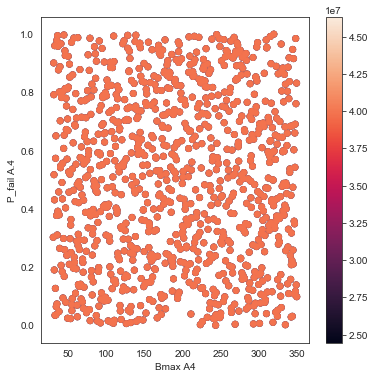

In [31]:
# Figure 1 - Dike Investment Costs and A.4_Pfail, A.4_Bmax
A4Cost = outcomesagg['Total A.4 Dike Investment Costs']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=A4Cost )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

#change colour scheme to 'viridis' for consistency

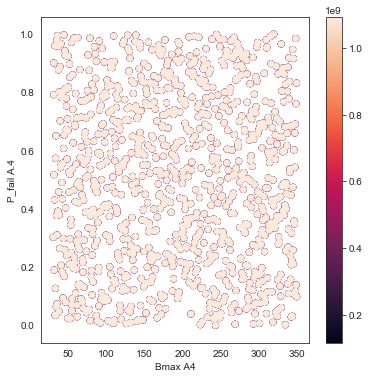

In [32]:
# Figure 2 - Room for the River (RfR) Costs and A.4_Pfail, A.4_Bmax
RfRCost = outcomesagg['Total RfR Total Costs']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=RfRCost )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

#change colour scheme to 'viridis' for consistency

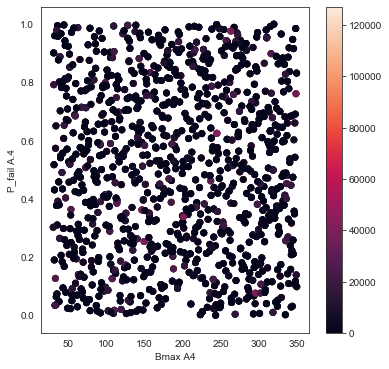

In [33]:
# Figure 3 - Expected Evacuation Costs and A.4_Pfail, A.4_Bmax
EEC = outcomesagg['Total Expected Evacuation Costs']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=EEC )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

#change colour scheme to 'viridis' - hard to see red/purple dots

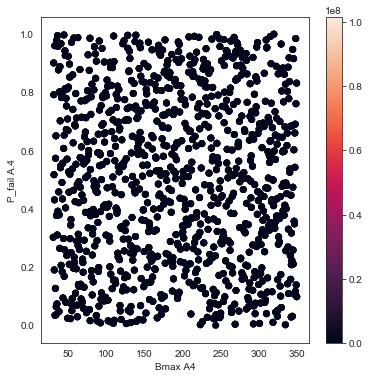

In [34]:
# Figure 4 - Expected Annual Damage and A.4_Pfail, A.4_Bmax
EAD = outcomesagg['Total A.4 Expected Annual Damage']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=EAD )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

#change colour scheme to 'viridis' for consistency

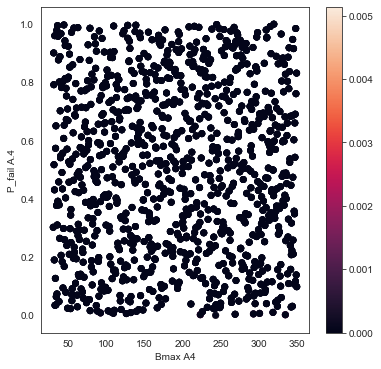

In [35]:
# Figure 4 - Expected Number of Deaths and A.4_Pfail, A.4_Bmax
END = outcomesagg['Total A.4 Expected Number of Deaths']
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.4_Bmax'], experiments['A.4_pfail'], c=END )
plt.colorbar(sc)
ax.set_xlabel('Bmax A4')
ax.set_ylabel('P_fail A.4')
plt.show()

#change colour scheme to 'viridis' for consistency

### Summary of mapping results
* Figure 1 shows that the Dike Investment Costs are not sensitive to the probability of dike failure and the maximum breach width. This is understandable since the probability of failure and breach width are dependent on factors other than how much was spent on the dike. This finding is useful because it highlights the fact that the amount spent on the dike does not guarantee that it will not fail or breach.
* Figure 2 shows a similar relationship between the RfR costs and dike failure and breach costs. This indicates that the implementation of RfR does not prevent failure of any existing or new dikes. 
* As expected, in Figure 3 - the outcome that is most affected by the probability of dike failure and maximu breach width is the expected evacuation cost. This is understandeable since the higher the probability of failure and breach width, the higher the costs of evacuation, particularly for policies with low a number of days in the EWS(evacuation warning sytem).
* Since the candidate policies included the constraint the EAD and END outcomes be equal to zero, Figures 4 and 5 reflect that the probability of dike failure and maximumm breach width have no influence on the expected annual deaths and expected annual damages in Dike Ring 4. 

*For a more detailed picture, the experiments were mapped against the uncertainties and are shown below (Figure 6). 

## Feature Scoring - Uncertainties, Experiments and Outcomes

In [36]:
#aggregating outcomes of interest
outcomes_of_interest = ['Total A.4 Expected Annual Damage','Total A.4 Expected Number of Deaths',
                        'Total A.4 Dike Investment Costs', 'Total RfR Total Costs',
                        'Total Expected Evacuation Costs']

outcomes_interest2= {k:v.tolist() for k, v in outcomesagg.items()}
outcomesagg_rev = pd.DataFrame.from_dict(outcomes_interest2)
outcomesagg_rev = outcomesagg_rev[outcomes_of_interest]
outcomesagg_rev.head()

,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,0.000000e+00,0.000000,2.444716e+07,115300000.0,6952.116652
1,0.000000e+00,0.000000,2.444716e+07,115300000.0,1769.599709
2,0.000000e+00,0.000000,2.444716e+07,115300000.0,93.656472
3,0.000000e+00,0.000000,2.444716e+07,115300000.0,29.204301
4,4.521576e+06,0.000348,2.444716e+07,115300000.0,377.745268


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


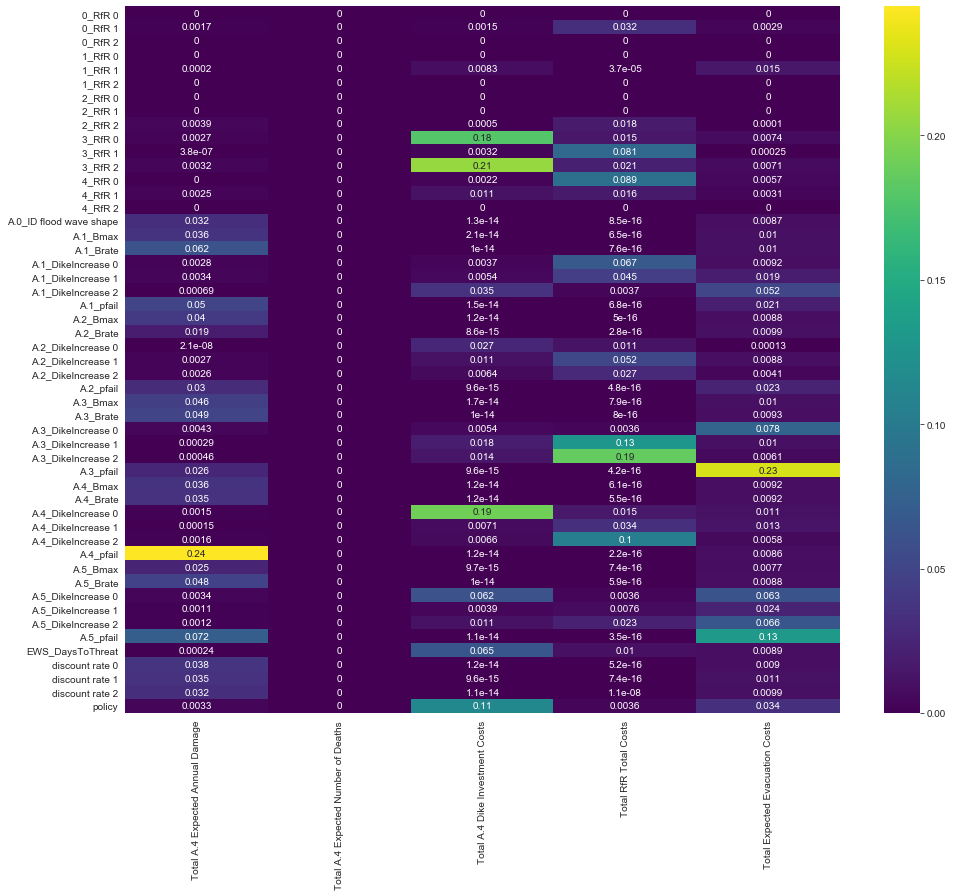

In [37]:
#Figure 6 - Feature Scoring with uncertainties, experiments and outcomes
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomesagg_rev

fs = feature_scoring.get_feature_scores_all(x, y)


plt.figure(figsize = (16,13))
sns.heatmap(fs, cmap='viridis', annot=True, )
plt.show()

### Summary of Feature Scoring - Uncertainties, Experiments and Outcomes
* Expected Annual Damage in Dike Ring 4 is mostly influenced by the probability of failure of the dike in Dike Ring 4 (A4_pfail), with some additional influence from the probability of failure in Dike Ring 5 (A5_pfail).
* Dike Investment costs in Dike Ring 4 are most heavily influenced by dike heightening and RfR in A4, as well as some influence from dike heightening in Dike Ring 5.
* RfR costs in Dike Ring 4 are strongly influenced by dike heightening in Dike Ring 3, and Dike Ring 4, with some influence from RfR in Dike Rings 4 and 5.
* Total Expected Evacuation costs in Dike Ring 4 are strongly influenced by the probability of dike falure and dike heightening in Dike Ring 3, the probability of failure in Dike Ring 5 and Dike Ring 1. 


This shows that collaboration with other dike rings is necessary for Dike Ring 4 to be able to meet it's outcomes satisfactorily. 

## Sensitivity Analysis

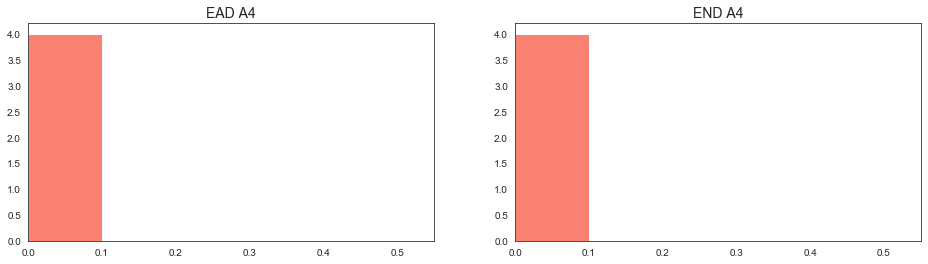

In [41]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.set_title('EAD A4', size=14)
ax2.set_title('END A4', size=14)

ax1.hist(outcomesdf['Total A.4 Expected Annual Damage'], color="salmon")
ax1.set_xlim(left=0)
ax2.hist(outcomesdf['Total A.4 Expected Number of Deaths'], color="salmon")
ax2.set_xlim(left=0)

plt.show()

#label axes
# is this sensitivity analyis referred to in last paragraph? not sure what these are showing..

In [44]:
print(np.percentile(outcomesdf['Total A.4 Expected Annual Damage'],61))
print(outcomesdf['Total A.4 Expected Annual Damage'].mean())
print(np.percentile(outcomesdf['Total A.4 Expected Number of Deaths'],61))
print(outcomesdf['Total A.4 Expected Number of Deaths'].mean())

0.0
0.0
0.0
0.0


It shows that these policies are robust because it results zero EAD and casualties in all 1000 random scenarios.

In [48]:
print(experiments['A.4_pfail'].min())
print(experiments['A.4_pfail'].max())

8.123715003444454e-05
0.9997591813417245


Based on the Sensitivity Analysis, the Total A.4 Expected Annual Damage and Total A.4 Expected Number of Deaths are quite sensitive to the A.4_pfail and policy. Therefore, it is necessary to check whether the A.4_pfail values used in the 1000 scenarios has adequately covered. 
The A.4_pfail values used are spanned from 8.123715003444454e-05 to 0.9997591813417245 (the possible pfail value is between 0 and 1, as it is the probability). This range is considered sufficient to support the candidate policies' robustness.